Intro to Classification Exercises

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [29]:
import pandas as pd
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [30]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [31]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [32]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

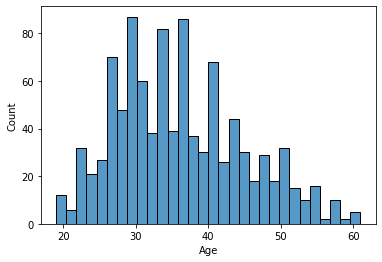

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(ad_data['Age'],bins=30)
plt.show()

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [34]:
from sklearn.preprocessing import StandardScaler

**First: you need to drop object variables, as the scaller can be applied only on int and float variables**
** Create a StandardScaler() object called scaler.**

In [35]:
y=ad_data['Clicked on Ad']
X=ad_data.drop(["Ad Topic Line","City","Country","Timestamp","Clicked on Ad"],axis=1)
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


**Fit scaler to the features.**

In [36]:
scaler=StandardScaler().fit(X.values)

**Use the .transform() method to transform the features to a scaled version.**

In [37]:
X_scaled=scaler.transform(X.values)
X_scaled

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   , -0.96269532],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538,  1.03875025],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905, -0.96269532],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388,  1.03875025],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208, -0.96269532],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 , -0.96269532]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [38]:
ad_data1=pd.DataFrame(X_scaled,columns=["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Male"])

In [39]:
ad_data1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [40]:
import sklearn.model_selection as model_selection
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
feature_cols=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']
X_train,X_test,y_train,y_test=model_selection.train_test_split(ad_data1,y,test_size=0.33,random_state=42)

**Train and fit a logistic regression model on the training set.**

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [42]:
y_pred=logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

**Create a classification report for the model.**

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.98      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



**Get the best values for C and max_iter parameters for Logestic Regression**

In [44]:
from sklearn.model_selection import GridSearchCV
logreg=LogisticRegression()
lg_params=[{'C':[0.001,0.01,0.1,1,10,100,1000],'max_iter':[20,50,100,200,500,1000]}]
gscv=GridSearchCV(logreg,lg_params,cv=10)
gscv.fit(X_train,y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'C': 0.1, 'max_iter': 20}
0.9731343283582088


In [45]:
logreg=LogisticRegression(C=gscv.best_params_.get('C'),max_iter=gscv.best_params_.get('max_iter'))
logreg=logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

**Create a classification report for the best model.**

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       162
           1       0.99      0.93      0.96       168

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [50]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

**Create a confusion matrix and classification report.**

In [51]:
print(confusion_matrix(y_test,y_pred))

[[152  10]
 [ 13 155]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       162
           1       0.94      0.92      0.93       168

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [53]:
import numpy as np
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred= knn.predict(X_test)
  error_rate.append(np.mean(y_pred != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

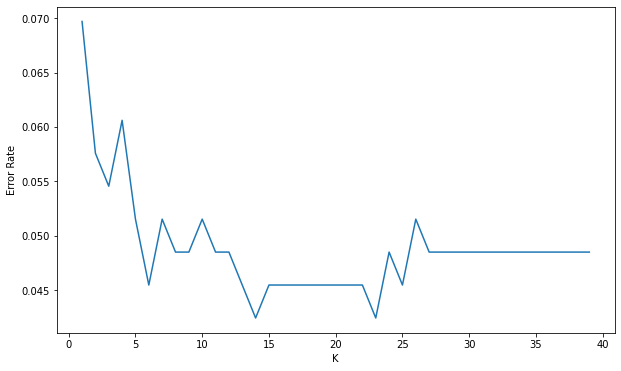

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [55]:
best_k=error_rate.index(min(error_rate))+1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train) 
y_pred = knn.predict(X_test)
'''
y_actual = pd.Series(y_train, name='Actual')
y_predicted = pd.Series(y_pred, name='Predicted')'''
print(confusion_matrix(y_test, y_pred))

[[161   1]
 [ 13 155]]


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       162
           1       0.99      0.92      0.96       168

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330

